<a href="https://colab.research.google.com/github/ahmadshah5/Ahmad-Task-5/blob/main/Final_Project_of_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Title: Movie Genre Prediction using NLP
# By: Ahmad Hassan Shah

# Section 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer



In [11]:

# We will create a small list of movie plots and their genres for this demo.
data = {
    'plot': [
        # Action plots
        "A cop must defuse a bomb on a speeding bus. He races against time with the help of a passenger.",
        "A spy must retrieve stolen nuclear codes. He chases the villain across the city in sports cars.",
        "A soldier leads a mission to rescue hostages from terrorists in an embassy.",
        "A martial artist enters a tournament to defeat the champion who killed his teacher.",

        # Comedy plots
        "Four friends go on a road trip for a wedding. Everything that can go wrong, does.",
        "A clumsy man gets a job at a zoo. His funny mistakes cause chaos but save the day.",
        "A family tries to win a talent show. Their act is a hilarious disaster.",
        "A man pretends to be a prince to impress a woman. His lies get funnier and more complicated.",

        # Horror plots
        "A family moves into a haunted house. They are terrorized by ghosts at night.",
        "Teenagers go camping in the woods. A masked killer hunts them one by one.",
        "A demon possesses a young child. A priest is called to perform an exorcism.",
        "Scientists experiment with a portal to another dimension. Monstrous creatures break through.",

        # Drama plots
        "A lawyer defends an innocent man in a racist town. He faces many challenges but fights for justice.",
        "A musician struggles with addiction. He tries to reconnect with his family and rebuild his career.",
        "Two siblings fight over their family's business inheritance after their father's death.",
        "An old man fulfills his wife's last wish by going on an adventure with a young friend.",

        # Fantasy plots
        "A young farm boy discovers he has magic powers. He goes on a quest to defeat an evil sorcerer.",
        "A group of dwarves recruits a hobbit to help them reclaim their mountain from a dragon.",
        "Children enter a magical world through a wardrobe. They become kings and queens and fight a witch.",
        "A wizard mentors a young girl. They go on a journey to find a fallen star.",
    ],
    'genre': [
        'Action', 'Action', 'Action', 'Action',
        'Comedy', 'Comedy', 'Comedy', 'Comedy',
        'Horror', 'Horror', 'Horror', 'Horror',
        'Drama', 'Drama', 'Drama', 'Drama',
        'Fantasy', 'Fantasy', 'Fantasy', 'Fantasy'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
print("✅ Custom Dataset Created!")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

✅ Custom Dataset Created!
Dataset Shape: (20, 2)

First 5 rows:


,plot,genre
0,A cop must defuse a bomb on a speeding bus. He...,Action
1,A spy must retrieve stolen nuclear codes. He c...,Action
2,A soldier leads a mission to rescue hostages f...,Action
3,A martial artist enters a tournament to defeat...,Action
4,Four friends go on a road trip for a wedding. ...,Comedy


Missing Values:
 plot     0
genre    0
dtype: int64


/tmp/ipython-input-3893295582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='genre', order=df['genre'].value_counts().index, palette='viridis')


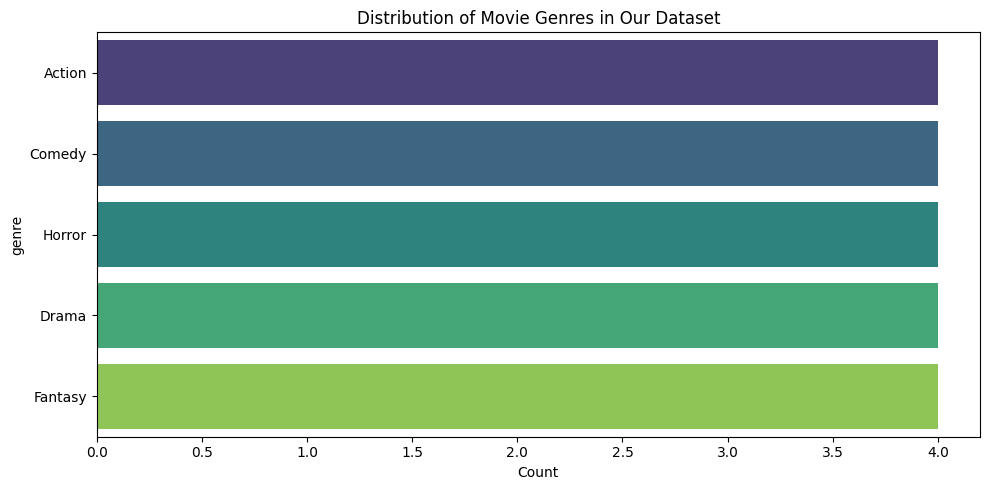

In [12]:

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Let's see the distribution of genres
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='genre', order=df['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Movie Genres in Our Dataset')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In [13]:

# Convert the 'genre' string labels into a list of genres (required for multi-label format)
# Since each movie has only one genre here, we wrap it in a list.
df['genre_list'] = df['genre'].apply(lambda x: [x])

# Prepare the labels (Multi-label Binarization - even though it's single-label here)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre_list'])
class_names = mlb.classes_

print("Our classes (genres):", class_names)

# Prepare the features (Text Vectorization using TF-IDF)
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['plot'])

print("Shape of our vectorized features (X):", X.shape)
print("Shape of our labels (y):", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Our classes (genres): ['Action' 'Comedy' 'Drama' 'Fantasy' 'Horror']
Shape of our vectorized features (X): (20, 150)
Shape of our labels (y): (20, 5)
Training samples: 14
Testing samples: 6


In [14]:

# Use Logistic Regression with OneVsRest strategy
model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
model.fit(X_train, y_train)
print("✅ Model Training Complete!")

✅ Model Training Complete!


In [21]:

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))



Model Accuracy: 0.00

Detailed Classification Report:

              precision    recall  f1-score   support

      Action       0.00      0.00      0.00         2
      Comedy       0.00      0.00      0.00         1
       Drama       0.00      0.00      0.00         1
     Fantasy       0.00      0.00      0.00         1
      Horror       0.00      0.00      0.00         1

   micro avg       0.00      0.00      0.00         6
   macro avg       0.00      0.00      0.00         6
weighted avg       0.00      0.00      0.00         6
 samples avg       0.00      0.00      0.00         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:

# Let's see the model in action!
new_plots = [
    "A knight fights a dragon to save a princess in a castle.", # Should be Fantasy
    "A guy slips on a banana peel and falls into a wedding cake.", # Should be Comedy
    "A detective solves a murder mystery in a small town full of secrets." # Should be Drama
]

print("🧪 Testing the model on new plots:\n")
for i, plot in enumerate(new_plots):
    new_plot_vectorized = tfidf.transform([plot])
    prediction = model.predict(new_plot_vectorized)
    predicted_genres = mlb.inverse_transform(prediction)
    print(f"Plot {i+1}: '{plot}'")
    print(f"--> Predicted Genre: {predicted_genres}\n")

🧪 Testing the model on new plots:

Plot 1: 'A knight fights a dragon to save a princess in a castle.'
--> Predicted Genre: [()]

Plot 2: 'A guy slips on a banana peel and falls into a wedding cake.'
--> Predicted Genre: [()]

Plot 3: 'A detective solves a murder mystery in a small town full of secrets.'
--> Predicted Genre: [()]

